# Load data

In [63]:
import pandas, json
from os import path
from pandas.io.json import json_normalize

HOME_PATH = path.join("/home", "jovyan")
SNAPSHOT_PATH = path.join(HOME_PATH, "data", "production", "state", "snapshots.json")

def to_dataframe(file, snapshot_path=SNAPSHOT_PATH):
    dataframe = pandas.read_json(os.path.join(snapshot_path, file), lines=True)
    return json_normalize(json.loads(dataframe.to_json(orient='records')))
    
def load_snapshot_data(snapshot_path=SNAPSHOT_PATH):
    json_paths = os.listdir(snapshot_path)
    dataframes = [to_dataframe(file) for file in json_paths]
    
    return pandas.concat(dataframes)

In [65]:
snapshots = load_snapshot_data()
snapshots.head()

,drive.orientation,drive.throttle,imagePath,start,timeWindow,trigger,uuid,vehicle.backLeft.command.value,vehicle.backLeft.speed,vehicle.backRight.command.value,vehicle.backRight.speed,vehicle.frontLeft.command.value,vehicle.frontLeft.speed,vehicle.frontRight.command.value,vehicle.frontRight.speed
0,90,0,/dev/null,1525649884634,355,hub,eefd697a-bf3e-42f3-817d-9e1cf1132d4b,4,0,4,0,4,0,4,0
0,90,0,/dev/null,1525650211262,392,hub,de37303f-9e38-4bd1-92d1-85096f802cb9,4,0,4,0,4,0,4,0
0,90,0,/dev/null,1525650402026,371,hub,47de5f17-60b4-4838-acc1-17bf7e1891b4,4,0,4,0,4,0,4,0
1,90,0,/home/miguel/IdeaProjects/RapBot/data/producti...,1525650406810,82,websocket,e2ce5c18-7f39-4155-8139-e28a22e228e3,4,0,4,0,4,0,4,0
2,90,5,/home/miguel/IdeaProjects/RapBot/data/producti...,1525650411211,98,driver,76f86f63-f9c9-4060-90db-6d3ef8662875,1,5,1,5,1,5,1,5


In [8]:
snapshots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580 entries, 0 to 0
Data columns (total 15 columns):
drive.orientation                   1580 non-null int64
drive.throttle                      1580 non-null int64
imagePath                           1580 non-null object
start                               1580 non-null int64
timeWindow                          1580 non-null int64
trigger                             1228 non-null object
uuid                                1580 non-null object
vehicle.backLeft.command.value      1580 non-null int64
vehicle.backLeft.speed              1580 non-null int64
vehicle.backRight.command.value     1580 non-null int64
vehicle.backRight.speed             1580 non-null int64
vehicle.frontLeft.command.value     1580 non-null int64
vehicle.frontLeft.speed             1580 non-null int64
vehicle.frontRight.command.value    1580 non-null int64
vehicle.frontRight.speed            1580 non-null int64
dtypes: int64(12), object(3)
memory usage: 197.5+ KB


In [9]:
snapshots.describe()

,drive.orientation,drive.throttle,start,timeWindow,vehicle.backLeft.command.value,vehicle.backLeft.speed,vehicle.backRight.command.value,vehicle.backRight.speed,vehicle.frontLeft.command.value,vehicle.frontLeft.speed,vehicle.frontRight.command.value,vehicle.frontRight.speed
count,1580.000000,1580.000000,1.580000e+03,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,147.189873,46.069620,1.525030e+12,51.601266,1.612658,43.334177,1.612658,33.067722,1.612658,43.334177,1.612658,33.067722
std,98.881404,85.393669,1.216957e+09,41.153806,0.877178,82.938876,0.877178,62.510836,0.877178,82.938876,0.877178,62.510836
min,30.000000,0.000000,1.522644e+12,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,90.000000,0.000000,1.525650e+12,37.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,90.000000,0.000000,1.525652e+12,51.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,270.000000,40.000000,1.525652e+12,63.000000,2.000000,33.500000,2.000000,35.000000,2.000000,33.500000,2.000000,35.000000
max,330.000000,255.000000,1.525652e+12,406.000000,4.000000,255.000000,4.000000,255.000000,4.000000,255.000000,4.000000,255.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01388a26d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f01382aa080>]], dtype=object)

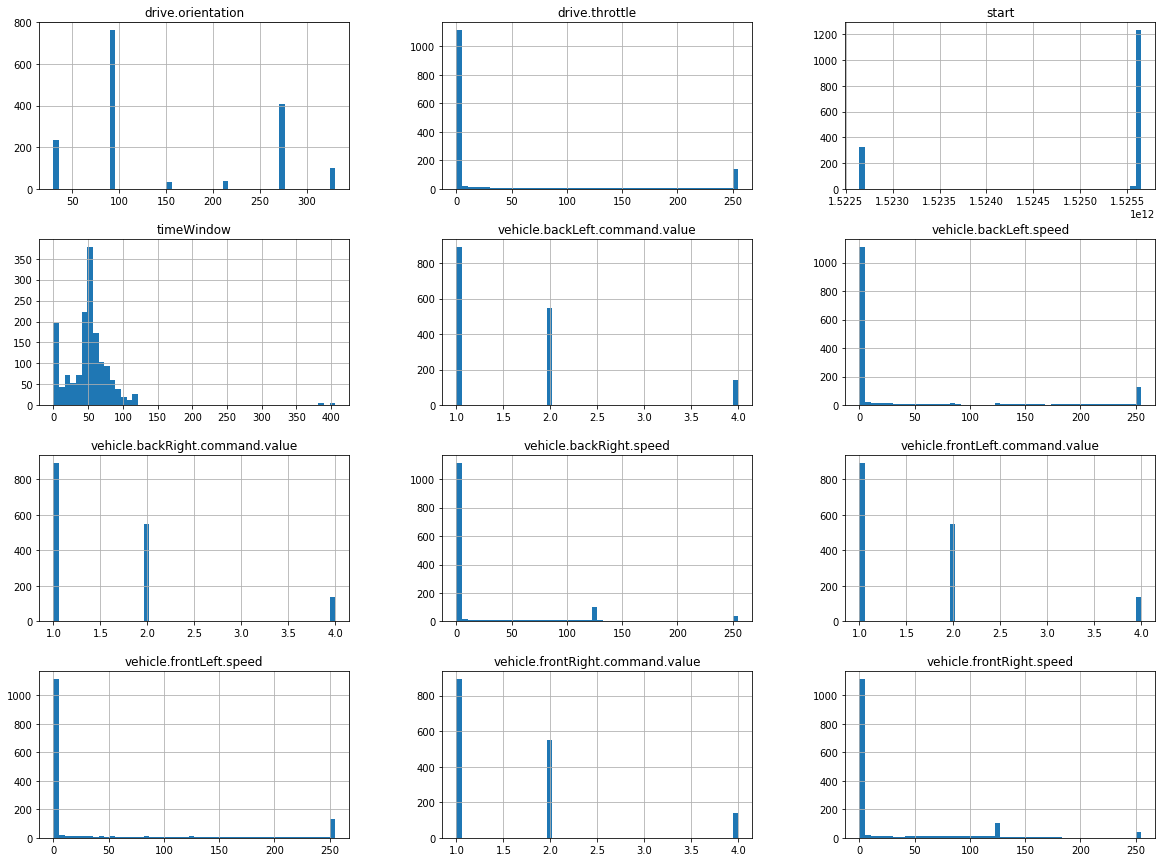

In [10]:
%matplotlib inline

snapshots.hist(bins=50, figsize=(20, 15))

# Split into train and test sets

In [7]:
import hashlib, numpy

def test_set_check(identifier, test_ratio, hash):
    return hash(identifier).digest()[-1] < (256 * test_ratio)

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_.encode(), test_ratio, hash))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
train_set, test_set = split_train_test_by_id(snapshots, 0.2, "uuid")
print(len(train_set), "train + ", len(test_set), "test")

263 train +  63 test


# Filter snapshots without an image

In [68]:
snapshots["imagePath"] == "/dev/null"

0       True
0       True
0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25      True
26      True
27      True
       ...  
309    False
310    False
311    False
312    False
313    False
314    False
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
0       True
1      False
0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
0       True
0       True
0       True
Name: imagePath, Length: 1580, dtype: bool

# Load images

In [67]:
BASE_IMAGE_PATH = '/home/miguel/IdeaProjects/RapBot/'
#snapshots["imagePath"] = snapshots["imagePath"].apply(lambda p: path.join(HOME_PATH, path.relpath(p, BASE_IMAGE_PATH)))
#snapshots["imagePath"].apply(lambda p: path.relpath(p, BASE_IMAGE_PATH)).apply(lambda p: path.join(HOME_PATH, p)).head()

ValueError: Array conditional must be same shape as self

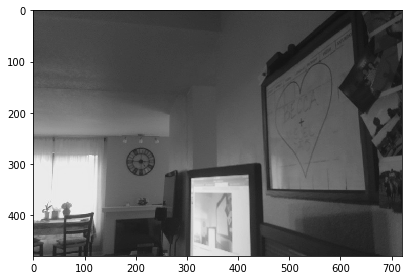

In [33]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray

img = imread(p)
image = rgb2gray(img)
imshow(image)

In [34]:
print(image.shape)
features = image.reshape(image.shape[0] * image.shape[1])
print(features.shape)
features

(480, 720)
(345600,)


array([ 0.28965922,  0.28965922,  0.28965922, ...,  0.34011882,
        0.33227569,  0.33227569])

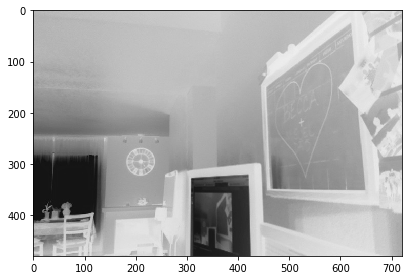

In [42]:
from skimage import util
imshow(util.invert(img))

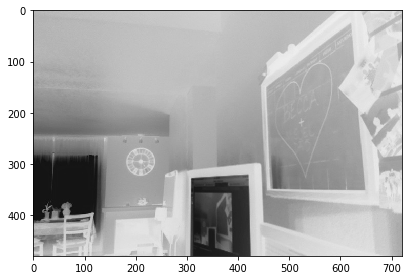

In [38]:
imshow(util.invert(image))

In [48]:
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

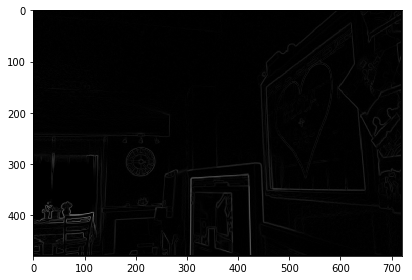

In [52]:
imshow(sobel(image))

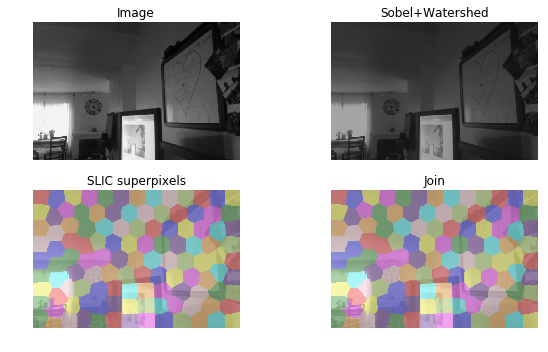

In [49]:
# Make segmentation using edge-detection and watershed.
edges = sobel(image)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(image)
foreground, background = 1, 2
markers[image < 30.0] = background
markers[image > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# Make segmentation using SLIC superpixels.
seg2 = slic(image, n_segments=117, max_iter=160, sigma=1, compactness=0.75, multichannel=False)

# Combine the two.
segj = join_segmentations(seg1, seg2)

# Show the segmentations.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')

color1 = label2rgb(seg1, image=image, bg_label=0)
ax[1].imshow(color1)
ax[1].set_title('Sobel+Watershed')

color2 = label2rgb(seg2, image=image, image_alpha=0.5)
ax[2].imshow(color2)
ax[2].set_title('SLIC superpixels')

color3 = label2rgb(segj, image=image, image_alpha=0.5)
ax[3].imshow(color3)
ax[3].set_title('Join')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()